# 0.0. IMPORTS

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import yfinance as yf
import seaborn as sns
import plotly.graph_objs as go

## 0.1. Loanding Data

In [7]:
ticket = yf.Ticker('^BVSP')
df = ticket.history(interval='1d', start='2018-01-01', end='2021-01-01')
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-02:00,76403.0,77909.0,76403.0,77891.0,2880300,0.0,0.0
2018-01-03 00:00:00-02:00,77889.0,78414.0,77602.0,77995.0,3142200,0.0,0.0
2018-01-04 00:00:00-02:00,77998.0,79135.0,77998.0,78647.0,3486100,0.0,0.0
2018-01-05 00:00:00-02:00,78644.0,79071.0,78218.0,79071.0,2747100,0.0,0.0
2018-01-08 00:00:00-02:00,79070.0,79395.0,78631.0,79379.0,2550800,0.0,0.0


# 1.0. DATA VISUALIZATION

## 1.1. Decomposição de uma série temporal

In [8]:
df[['Close']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 741 entries, 2018-01-02 00:00:00-02:00 to 2020-12-30 00:00:00-03:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   741 non-null    float64
dtypes: float64(1)
memory usage: 11.6 KB


In [9]:
decomposicao = seasonal_decompose(df[['Close']], model='additive', period=30, extrapolate_trend=30)

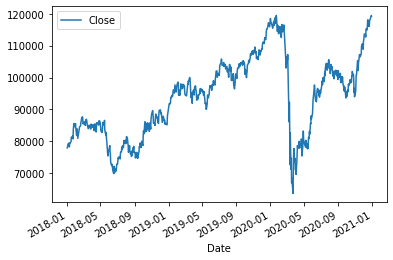

In [10]:
df[['Close']].plot()

In [11]:
decomposicao.seasonal + decomposicao.resid + decomposicao.trend

Date
2018-01-02 00:00:00-02:00     77891.0
2018-01-03 00:00:00-02:00     77995.0
2018-01-04 00:00:00-02:00     78647.0
2018-01-05 00:00:00-02:00     79071.0
2018-01-08 00:00:00-02:00     79379.0
                               ...   
2020-12-22 00:00:00-03:00    116348.0
2020-12-23 00:00:00-03:00    117857.0
2020-12-28 00:00:00-03:00    119051.0
2020-12-29 00:00:00-03:00    119475.0
2020-12-30 00:00:00-03:00    119306.0
Length: 741, dtype: float64

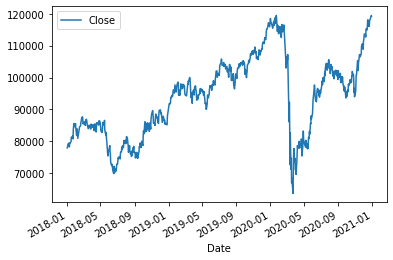

In [12]:
df[['Close']].plot()

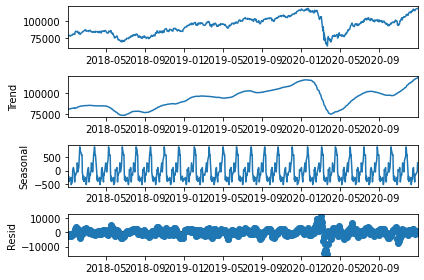

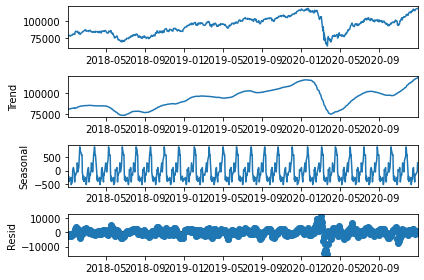

In [13]:
decomposicao.plot()

In [14]:
decomposicao.seasonal

Date
2018-01-02 00:00:00-02:00    -58.685617
2018-01-03 00:00:00-02:00   -360.182412
2018-01-04 00:00:00-02:00   -213.151208
2018-01-05 00:00:00-02:00   -413.483336
2018-01-08 00:00:00-02:00   -326.033465
                                ...    
2020-12-22 00:00:00-03:00   -138.845623
2020-12-23 00:00:00-03:00   -178.295968
2020-12-28 00:00:00-03:00    -67.244979
2020-12-29 00:00:00-03:00    -17.071324
2020-12-30 00:00:00-03:00    289.773665
Name: seasonal, Length: 741, dtype: float64

In [15]:
decomposicao_mult = seasonal_decompose(df[['Close']], model='multiplicative', period=30, extrapolate_trend=30)

In [16]:
decomposicao_mult.seasonal

Date
2018-01-02 00:00:00-02:00    0.999506
2018-01-03 00:00:00-02:00    0.995696
2018-01-04 00:00:00-02:00    0.997951
2018-01-05 00:00:00-02:00    0.995404
2018-01-08 00:00:00-02:00    0.996471
                               ...   
2020-12-22 00:00:00-03:00    0.999131
2020-12-23 00:00:00-03:00    0.998075
2020-12-28 00:00:00-03:00    0.999495
2020-12-29 00:00:00-03:00    1.000454
2020-12-30 00:00:00-03:00    1.004161
Name: seasonal, Length: 741, dtype: float64

In [17]:
max(decomposicao_mult.resid)

1.1168764268877

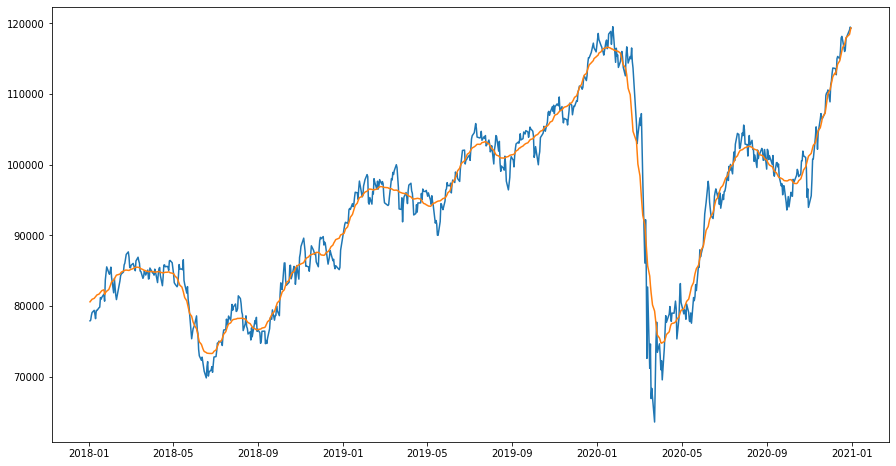

In [19]:
ax, fig = plt.subplots(figsize=(15,8))
plt.plot(decomposicao.observed)
plt.plot(decomposicao.trend)

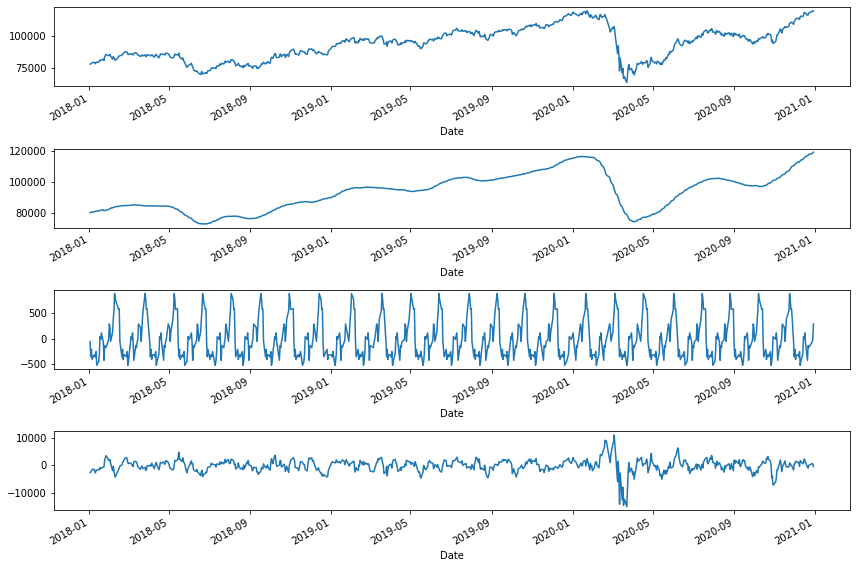

In [21]:
fig, (ax1, ax2, ax3 , ax4) = plt.subplots(4, 1, figsize=(12,8))
decomposicao.observed.plot(ax=ax1)
decomposicao.trend.plot(ax=ax2)
decomposicao.seasonal.plot(ax=ax3)
decomposicao.resid.plot(ax=ax4)
plt.tight_layout()

## 1.2. Cálculo da média móvel

In [23]:
df['Close'].rolling(7).mean()

Date
2018-01-02 00:00:00-02:00              NaN
2018-01-03 00:00:00-02:00              NaN
2018-01-04 00:00:00-02:00              NaN
2018-01-05 00:00:00-02:00              NaN
2018-01-08 00:00:00-02:00              NaN
                                 ...      
2020-12-22 00:00:00-03:00    116752.571429
2020-12-23 00:00:00-03:00    117164.285714
2020-12-28 00:00:00-03:00    117579.285714
2020-12-29 00:00:00-03:00    117797.571429
2020-12-30 00:00:00-03:00    117961.714286
Name: Close, Length: 741, dtype: float64

In [24]:
media_movel7d = df['Close'].rolling(7).mean()
media_model4d = df['Close'].rolling(14).mean()
media_model21d = df['Close'].rolling(21).mean()

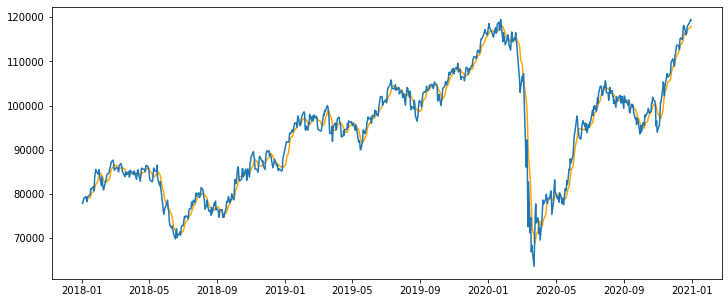

In [26]:
fig , ax = plt.subplots(figsize=(12,5))
plt.plot(media_movel7d, 'orange')
plt.plot(df['Close'])

## 1.3. Extração de features

In [28]:
df.reset_index(inplace=True)

In [31]:
# Criando features para cada periodo
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [32]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day
0,2018-01-02 00:00:00-02:00,76403.0,77909.0,76403.0,77891.0,2880300,0.0,0.0,2018,1,2
1,2018-01-03 00:00:00-02:00,77889.0,78414.0,77602.0,77995.0,3142200,0.0,0.0,2018,1,3
2,2018-01-04 00:00:00-02:00,77998.0,79135.0,77998.0,78647.0,3486100,0.0,0.0,2018,1,4
3,2018-01-05 00:00:00-02:00,78644.0,79071.0,78218.0,79071.0,2747100,0.0,0.0,2018,1,5
4,2018-01-08 00:00:00-02:00,79070.0,79395.0,78631.0,79379.0,2550800,0.0,0.0,2018,1,8


In [33]:
# Rentabilidade e preço atual / preço anterior *100 -100
df['Rentabilidade'] = df['Close'] / df['Close'].shift() * 100 -100

In [34]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,year,month,day,Rentabilidade
0,2018-01-02 00:00:00-02:00,76403.0,77909.0,76403.0,77891.0,2880300,0.0,0.0,2018,1,2,NaN
1,2018-01-03 00:00:00-02:00,77889.0,78414.0,77602.0,77995.0,3142200,0.0,0.0,2018,1,3,0.133520
2,2018-01-04 00:00:00-02:00,77998.0,79135.0,77998.0,78647.0,3486100,0.0,0.0,2018,1,4,0.835951
3,2018-01-05 00:00:00-02:00,78644.0,79071.0,78218.0,79071.0,2747100,0.0,0.0,2018,1,5,0.539118
4,2018-01-08 00:00:00-02:00,79070.0,79395.0,78631.0,79379.0,2550800,0.0,0.0,2018,1,8,0.389523


In [66]:
def features_extraction(df):
  df['year'] = df['Date'].dt.year
  df['month'] = df['Date'].dt.month
  df['day'] = df['Date'].dt.day
  df['Rentabilidade'] = df['Close'] / df['Close'].shift() * 100 -100

# 2.0. EXPLORATORY ANALYSIS

## Hipotese 1 : Existe um melhor mês para inventir no ativo ?

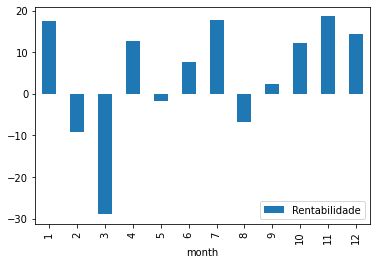

In [37]:
df.groupby('month').agg({'Rentabilidade':'sum'}).plot(kind='bar')

In [38]:
df.set_index('Date', inplace=True)

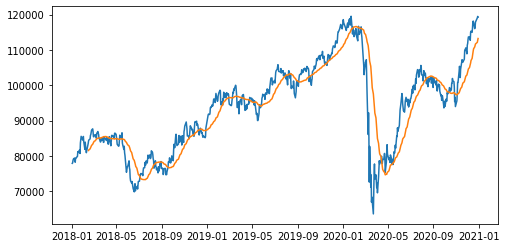

In [40]:
media_movel30d = df['Close'].rolling(30).mean()
media_model90d = df['Close'].rolling(90).mean()
fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df['Close'])
plt.plot(media_movel30d)

## Hipotese 2 : Existe um melhor dia para investir no ativo?

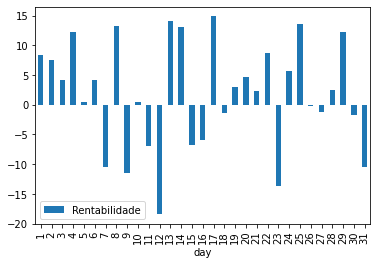

In [42]:
df.groupby('day').agg({'Rentabilidade':'sum'}).plot(kind='bar')

In [43]:
df.iloc[0]

Open               76403.0
High               77909.0
Low                76403.0
Close              77891.0
Volume           2880300.0
Dividends              0.0
Stock Splits           0.0
year                2018.0
month                  1.0
day                    2.0
Rentabilidade          NaN
Name: 2018-01-02 00:00:00-02:00, dtype: float64

In [44]:
df.iloc[-1]

Open             1.194100e+05
High             1.201500e+05
Low              1.189190e+05
Close            1.193060e+05
Volume           8.235700e+06
Dividends        0.000000e+00
Stock Splits     0.000000e+00
year             2.020000e+03
month            1.200000e+01
day              3.000000e+01
Rentabilidade   -1.414522e-01
Name: 2020-12-30 00:00:00-03:00, dtype: float64

In [45]:
df['Close'].iloc[-1] / df['Close'].iloc[0] * 100 -100

53.17045615026126

## Hipotese 3 : Correlação de séries temporais

In [59]:
tickets = ['VALE3.SA', 'ITUB4.SA', 'PETR4.SA', 'ABEV3.SA', 'BBDC4.SA', '^BVSP', 'USDBRL=X']

In [60]:
dfs = []

In [62]:
for t in tickets :
  print('Reading ticker {} ...'.format(t))
  ticket = yf.Ticker(t)
  aux = ticket.history(interval='1d', start='2020-01-01', end='2023-01-01')
  aux.reset_index(inplace=True)
  aux['ticket'] = t
  dfs.append(aux)

Reading ticker VALE3.SA ...
Reading ticker ITUB4.SA ...
Reading ticker PETR4.SA ...
Reading ticker ABEV3.SA ...
Reading ticker BBDC4.SA ...
Reading ticker ^BVSP ...
Reading ticker USDBRL=X ...


In [67]:
for d in dfs:
  features_extraction(d)

In [70]:
dfs[0]

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticket,year,month,day,Rentabilidade
0,2020-01-02 00:00:00-03:00,40.187562,40.530027,40.016330,40.448135,17509700,0.0,0.0,VALE3.SA,2020,1,2,NaN
1,2020-01-03 00:00:00-03:00,39.964219,40.574700,39.889771,40.150341,17284800,0.0,0.0,VALE3.SA,2020,1,3,-0.736238
2,2020-01-06 00:00:00-03:00,40.053554,40.053554,39.569637,39.912102,32787800,0.0,0.0,VALE3.SA,2020,1,6,-0.593368
3,2020-01-07 00:00:00-03:00,39.830209,40.343906,39.755761,40.202454,16326400,0.0,0.0,VALE3.SA,2020,1,7,0.727478
4,2020-01-08 00:00:00-03:00,40.351359,40.477921,39.919553,40.209904,15298500,0.0,0.0,VALE3.SA,2020,1,8,0.018531
...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,2022-12-23 00:00:00-03:00,85.279999,86.519997,85.080002,86.320000,18656500,0.0,0.0,VALE3.SA,2022,12,23,0.664723
741,2022-12-26 00:00:00-03:00,86.419998,87.540001,86.330002,87.110001,18407500,0.0,0.0,VALE3.SA,2022,12,26,0.915200
742,2022-12-27 00:00:00-03:00,88.000000,89.650002,87.470001,89.190002,26720300,0.0,0.0,VALE3.SA,2022,12,27,2.387788
743,2022-12-28 00:00:00-03:00,89.190002,90.209999,88.699997,88.989998,23314500,0.0,0.0,VALE3.SA,2022,12,28,-0.224246


In [71]:
correlacao = pd.DataFrame()
for d in dfs:
  correlacao[d['ticket'].iloc[0]] = d['Rentabilidade']

In [72]:
correlacao.head()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,^BVSP,USDBRL=X
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.736256,-1.051819,-0.814340,-1.406254,0.050619,-0.730352,-0.012097
2,-0.593349,-1.488193,1.182261,0.475426,-1.786179,-0.704291,0.176770
3,0.727469,-2.319909,-0.389482,0.210304,-1.737233,-0.184808,0.835123
4,0.018512,-1.629359,-0.619090,-0.472194,-1.546988,-0.355729,0.083802


In [73]:
correlacao.corr()

,VALE3.SA,ITUB4.SA,PETR4.SA,ABEV3.SA,BBDC4.SA,^BVSP,USDBRL=X
VALE3.SA,1.000000,0.403979,0.528089,0.251795,0.445479,0.661912,0.008209
ITUB4.SA,0.403979,1.000000,0.570672,0.539110,0.862754,0.759866,0.039671
PETR4.SA,0.528089,0.570672,1.000000,0.439113,0.612434,0.784985,0.071398
ABEV3.SA,0.251795,0.539110,0.439113,1.000000,0.544657,0.627163,0.060924
BBDC4.SA,0.445479,0.862754,0.612434,0.544657,1.000000,0.797701,0.060763
^BVSP,0.661912,0.759866,0.784985,0.627163,0.797701,1.000000,0.046302
USDBRL=X,0.008209,0.039671,0.071398,0.060924,0.060763,0.046302,1.000000


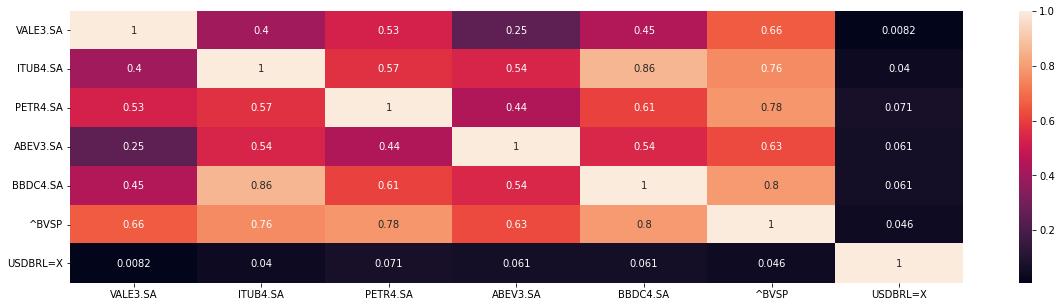

In [75]:
ax, fig = plt.subplots(figsize=(20,5))
ax = sns.heatmap(correlacao.corr(), annot=True)

In [77]:
def plot_lines(df_, columns=['Open', 'Close', 'High', 'Low']):
  fig = go.Figure()
  for c in columns:
    fig.add_trace(go.Scatter(x=list(df_.index),
                             y=df_[c],
                             mode='markers+lines',
                             name=c))
  return fig

In [78]:
plot_lines(df)

In [82]:
def plotCandleStick(df, acao='ticket'):
  trace1 = {
      'x': df.index,
      'open': df.Open,
      'close': df.Close,
      'high': df.High,
      'low': df.Low,
      'type': 'candlestick',
      'name': acao,
      'showlegend': False
  }

  data = [trace1]
  layout = go.Layout()

  fig = go.Figure(data=data , layout=layout)
  return fig

In [83]:
plotCandleStick(df)